In [1]:
# import geospatial packages
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import osmnx as ox
import sys
import re
import time

import random
from datetime import datetime, timedelta

# Import packages to connect to postgres
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

# load config.py from ../utils/config.py
sys.path.append('utils')
from config import *



In [2]:
# create connection
def connect_to_db():
    # Use the variables in config.py to connect to the database
    dbname = DBNAME
    username = USERNAME
    # host is localhost
    host = HOST
    # password is your postgres password
    password = PGPASS

    # connect
    try:
        con = psycopg2.connect(database = dbname, user = username, host = host, password = password)
        return con
    except:
        print("Unable to connect to the database")
        return None
con = connect_to_db()

# show all tables in public
def show_tables():
    query = """
    SELECT table_name
    FROM information_schema.tables
    WHERE table_schema = 'public'
    """
    return pd.read_sql_query(query, con
                                )
show_tables()

/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_44887/2903790500.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, con


,table_name
0,chi_parks
1,geography_columns
2,geometry_columns
3,spatial_ref_sys
4,event_spaces
5,Events by Conference Center
6,chi_comm
7,chi_streets
8,osm_poi
9,event_spaces_subset


In [31]:
sql = 'SELECT * FROM event_spaces;'

event_spaces = gpd.GeoDataFrame.from_postgis(sql, con, geom_col='geom' )
streets = gpd.GeoDataFrame.from_postgis('SELECT * FROM chi_streets;', con, geom_col='geom' )
parks = gpd.GeoDataFrame.from_postgis('SELECT * FROM chi_parks;', con, geom_col='geom' )
comms = gpd.GeoDataFrame.from_postgis('SELECT * FROM chi_comm;', con, geom_col='geom' )




/Users/coltonlapp/anaconda3/lib/python3.11/site-packages/geopandas/io/sql.py:170: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(
/Users/coltonlapp/anaconda3/lib/python3.11/site-packages/geopandas/io/sql.py:170: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(
/Users/coltonlapp/anaconda3/lib/python3.11/site-packages/geopandas/io/sql.py:170: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(
/Users/coltonlapp/anaconda3/lib/python3.11/site-packages/geopandas/io/sql.py:170: UserWarni

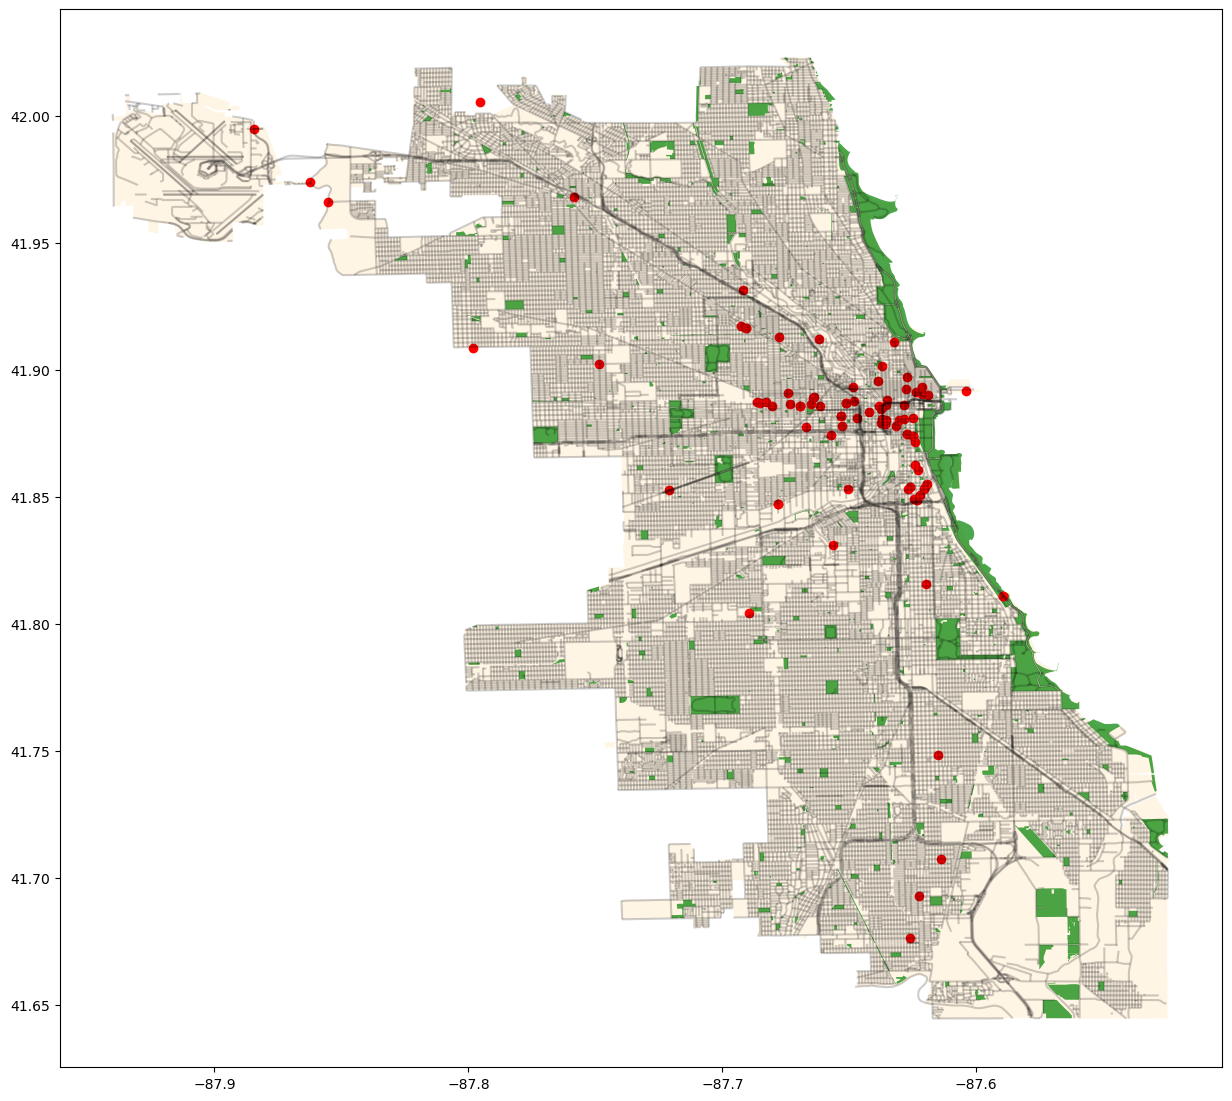

In [32]:
# plot all the data
fig, ax = plt.subplots(figsize=(15,15))
comms.plot(ax=ax, color='orange', alpha=.1)
streets.plot(ax=ax, color='black', alpha=0.2)
parks.plot(ax=ax, color='green', alpha=0.7)
event_spaces.plot(ax=ax, color='red', alpha=1)

plt.show()


In [33]:
# Define parameters in a dictionary
chicago_params = {
    "min_lat": 41.8708,
    "max_lat": 41.8920,
    "min_lon": -87.6317,
    "max_lon": -87.6101,
    "start_datetime": datetime(2024, 9, 21, 17, 0),  # Friday 5pm
    "end_datetime": datetime(2024, 9, 23, 22, 0)     # Sunday 10pm
}

def random_chicago_location_and_datetime(params):
    # Generate a random latitude and longitude within the bounding box
    random_lat = random.uniform(params["min_lat"], params["max_lat"])
    random_lon = random.uniform(params["min_lon"], params["max_lon"])

    # Calculate the difference in seconds between the start and end datetimes
    time_difference = (params["end_datetime"] - params["start_datetime"]).total_seconds()

    # Generate a random number of seconds to add to the start datetime
    random_seconds = random.uniform(0, time_difference)

    # Calculate the random datetime
    random_datetime = params["start_datetime"] + timedelta(seconds=random_seconds)

    # Put the data in a dictionary
    data = {
        "latitude": random_lat,
        "longitude": random_lon,
        "random_datetime": random_datetime
    }

    return data


In [34]:
event_spaces.crs

<Projected CRS: EPSG:3435>
Name: NAD83 / Illinois East (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Illinois - counties of Boone; Champaign; Clark; Clay; Coles; Cook; Crawford; Cumberland; De Kalb; De Witt; Douglas; Du Page; Edgar; Edwards; Effingham; Fayette; Ford; Franklin; Gallatin; Grundy; Hamilton; Hardin; Iroquois; Jasper; Jefferson; Johnson; Kane; Kankakee; Kendall; La Salle; Lake; Lawrence; Livingston; Macon; Marion; Massac; McHenry; McLean; Moultrie; Piatt; Pope; Richland; Saline; Shelby; Vermilion; Wabash; Wayne; White; Will; Williamson.
- bounds: (-89.27, 37.06, -87.02, 42.5)
Coordinate Operation:
- name: SPCS83 Illinois East zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

/Users/coltonlapp/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_72338/2605289926.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  user_buffer = user_point.buffer(0.01)
/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_72338/2605289926.py:17: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3435
Right

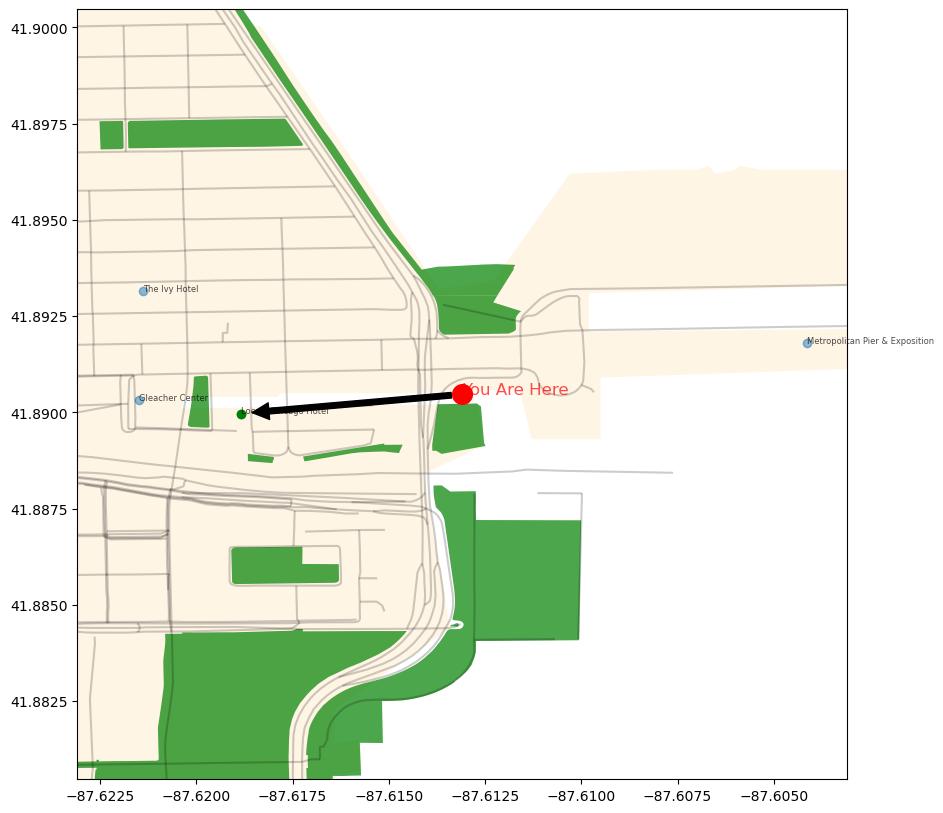

In [39]:
# Get random point
data = random_chicago_location_and_datetime(chicago_params)

# Convert lat/lon to a geodataframe
user_point = gpd.GeoDataFrame(
    [data],
    geometry=gpd.points_from_xy([data["longitude"]], [data["latitude"]])
)

# convert to crs of the event spaces
user_point.crs = {'init': 'epsg:4326'}

# create a separate polygon that is a buffer around user point
user_buffer = user_point.buffer(0.01)

# subset event_spaces by clipping to user_buffer
event_spaces_clipped = gpd.clip(event_spaces, user_buffer)


# plot the data overlayed on the event spaces
fig, ax = plt.subplots( figsize=(10, 10) )

# plot parks, comm, streets also 
comms.plot(ax=ax, color='orange', alpha=.1)
streets.plot(ax=ax, color='black', alpha=0.2)
parks.plot(ax=ax, color='green', alpha=0.7)

event_spaces_clipped.plot(ax=ax, alpha = .5)
user_point.plot(ax=ax, markersize=200 ,color='red')
ax.text(data["longitude"], data["latitude"], "You Are Here", fontsize=12, alpha = .7, color='red')

# Plot the closest event space
min_distance = event_spaces_clipped.distance(user_point.geometry[0]).min()
closest_event_space = event_spaces_clipped[event_spaces_clipped.distance(user_point.geometry[0]) == min_distance]
closest_event_space.plot(ax=ax, color='green' , alpha = 1)

# add arrow big
ax.annotate( '', xy=(closest_event_space.geometry.x, closest_event_space.geometry.y),
            xytext=(data["longitude"], data["latitude"]),
            arrowprops=dict(facecolor='black', shrink=0.05))



# Add text labels for event spaces based off "name" column
for x, y, label in zip(event_spaces_clipped.geometry.x, event_spaces_clipped.geometry.y, event_spaces_clipped['name']):
    ax.text(x, y, label, fontsize=6, alpha = .7)


# zoom to user_buffer
ax.set_xlim(user_buffer.bounds['minx'].values[0], user_buffer.bounds['maxx'].values[0])
ax.set_ylim(user_buffer.bounds['miny'].values[0], user_buffer.bounds['maxy'].values[0])

plt.show()


